<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Meme_Coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are Meme Coins or "Useful" Coins More Useful to an Investor?
## Initialization

In [1]:
from my_library import *

14:06:01 Starting...
14:06:01 Installing yfinance into Google notebook...
14:06:17 Installing arch into Google notebook...
14:06:26 Initialized.


## Get the Data

In [2]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-07,2.641823,1.379828,4.803535,5.147495,3.407962,4.718571,1.176411,2.624838,3.574977,3.084746,...,9.385160,4.467558,2.495974,1.548556,2.742627,6.033060,7.084814,0.709231,0.791194,2.717981
2025-06-08,-1.427546,0.849642,-1.566212,1.874727,0.367527,1.673640,0.173920,0.361444,-0.525693,-1.642689,...,-0.755018,2.230869,-1.767478,1.601873,0.071563,-0.392416,2.002123,1.112454,4.120263,0.213815
2025-06-09,11.575837,5.144642,7.651863,4.324388,3.441119,10.319721,4.267409,11.223712,5.822363,5.385063,...,12.533931,13.271572,4.878049,5.691987,4.398671,8.202109,15.486681,2.714547,2.361113,3.717618


## Plot the Data Existence Matrix

14:06:31 Wrote figure to 'Data Existence Matrix for Robinhood Cryptocurrency Sample.png'.


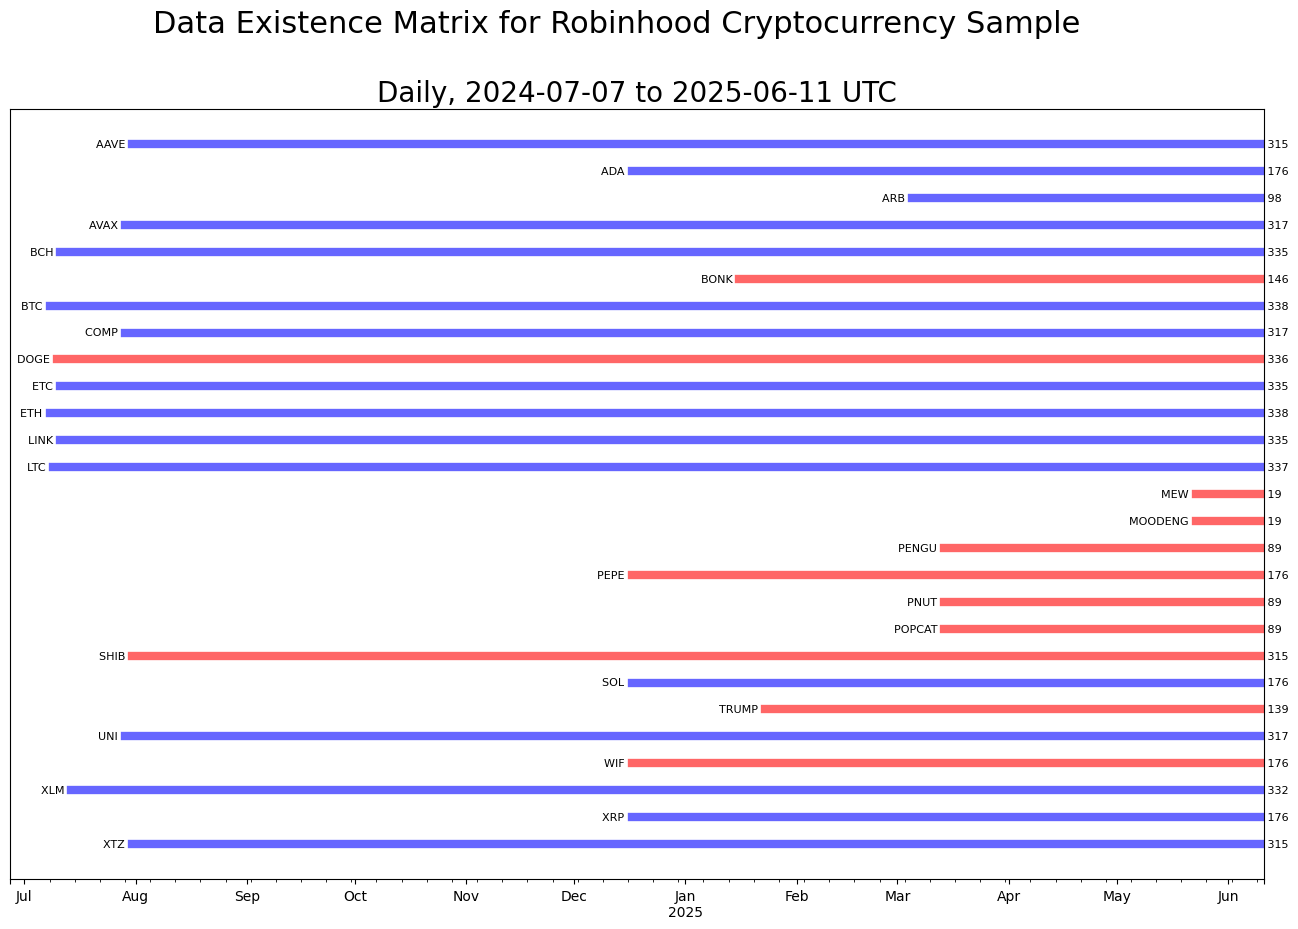

In [3]:
# data existence matrix
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
meme_coins="BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF,MEW,MOODENG".split(",")

(df:=data.apply(lambda x:pd.Series(x.items(),index=x.index).apply(lambda y:np.nan if np.isnan(y[1]) else list(reversed(data.columns)).index(y[0])),axis=1)).plot(
    ax=plot,
    legend=False,
    color=list(map(lambda c:"red" if c in meme_coins else "blue",df.columns)),
    linewidth=6,
    alpha=0.6
)
plot.set_xlabel(None)
figure.suptitle(title:='Data Existence Matrix for Robinhood Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data.index[0],data.index[-1]),fontsize=20)
plot.yaxis.set_visible(False)

for coin in data:
    plot.text(x:=df[coin].first_valid_index(),y:=df.loc[x,coin],coin+'  ',fontsize=8,ha='right',va='center')
    plot.text(xx:=df[coin].last_valid_index(),y," {:,d}".format((xx-x).n),fontsize=8,ha='left',va='center')

plot.set_xlim(df.index[0]-10,None)
figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

## Plot the Cumulative Returns with Median Imputation for New Listings

14:06:36 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


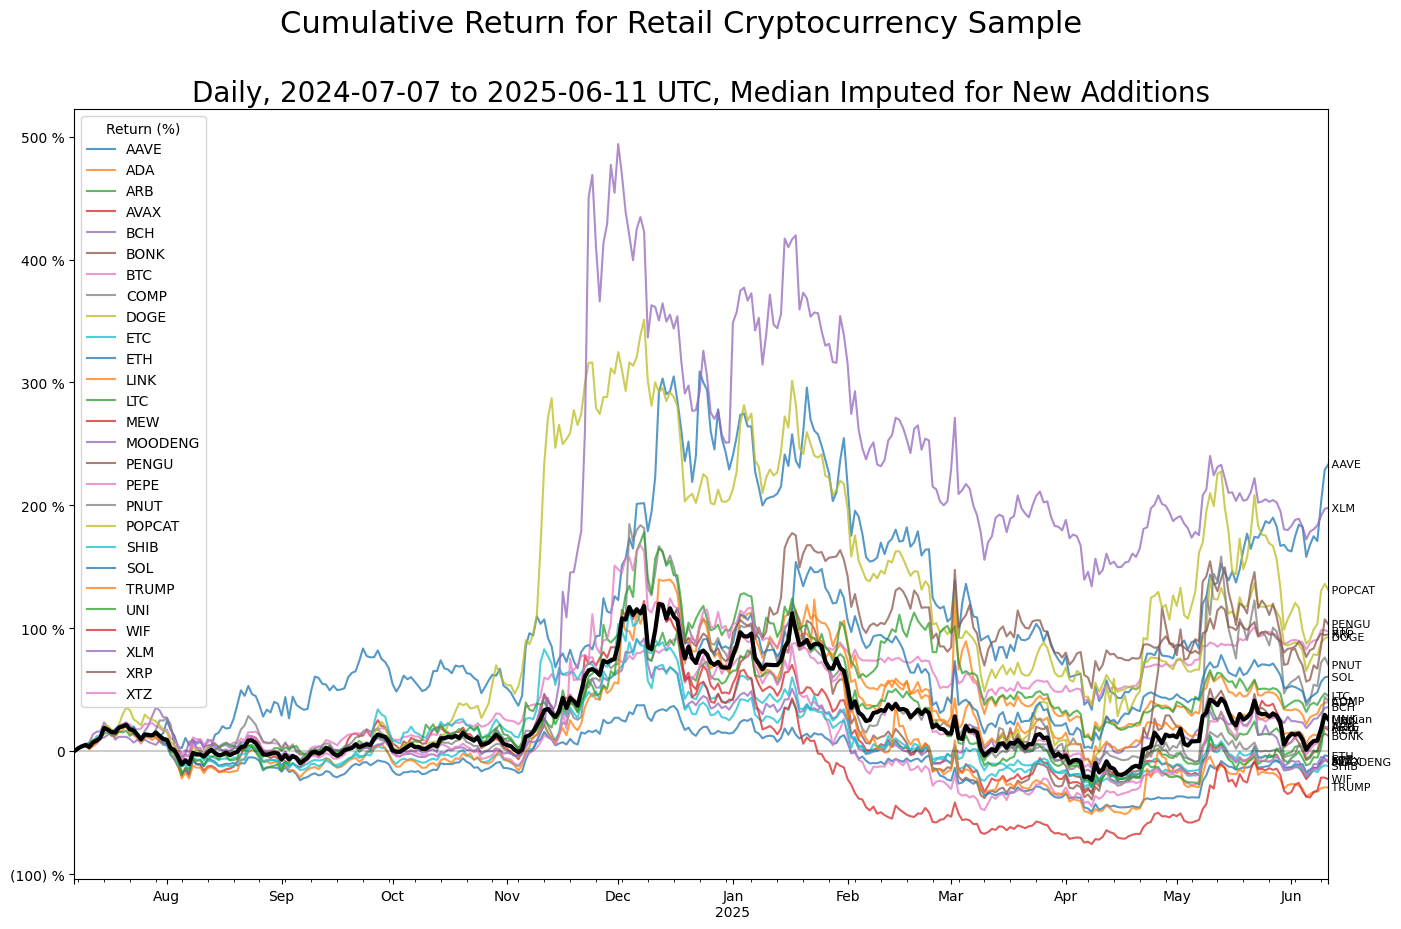

In [4]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

## Plot the Return by Coin

14:07:12 Excluding recently listed coins from analysis: MEW, MOODENG...


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.478249,0.855090,5.123625,90,0.540078,1.583272,0.113360,,1,0.0
ADA,0.019724,0.105082,3.978886,90,0.419411,0.250547,0.802164,,2,0.0
ARB,0.437287,0.364024,5.796350,90,0.610989,0.595795,0.551312,,3,0.0
AVAX,0.258842,0.314645,4.731840,90,0.498780,0.630829,0.528152,,4,0.0
BCH,0.141677,0.409038,3.826457,90,0.403344,1.014117,0.310527,,5,0.0
BONK,0.210342,0.860814,7.596828,90,0.800776,1.074974,0.282386,,6,1.0
BTC,0.215774,0.363205,2.318662,90,0.244408,1.486057,0.137264,,7,0.0
COMP,0.301920,0.541530,4.593119,90,0.484157,1.118501,0.263353,,8,0.0
DOGE,-0.010574,0.334709,5.052752,90,0.532607,0.628436,0.529719,,9,1.0


14:07:14 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


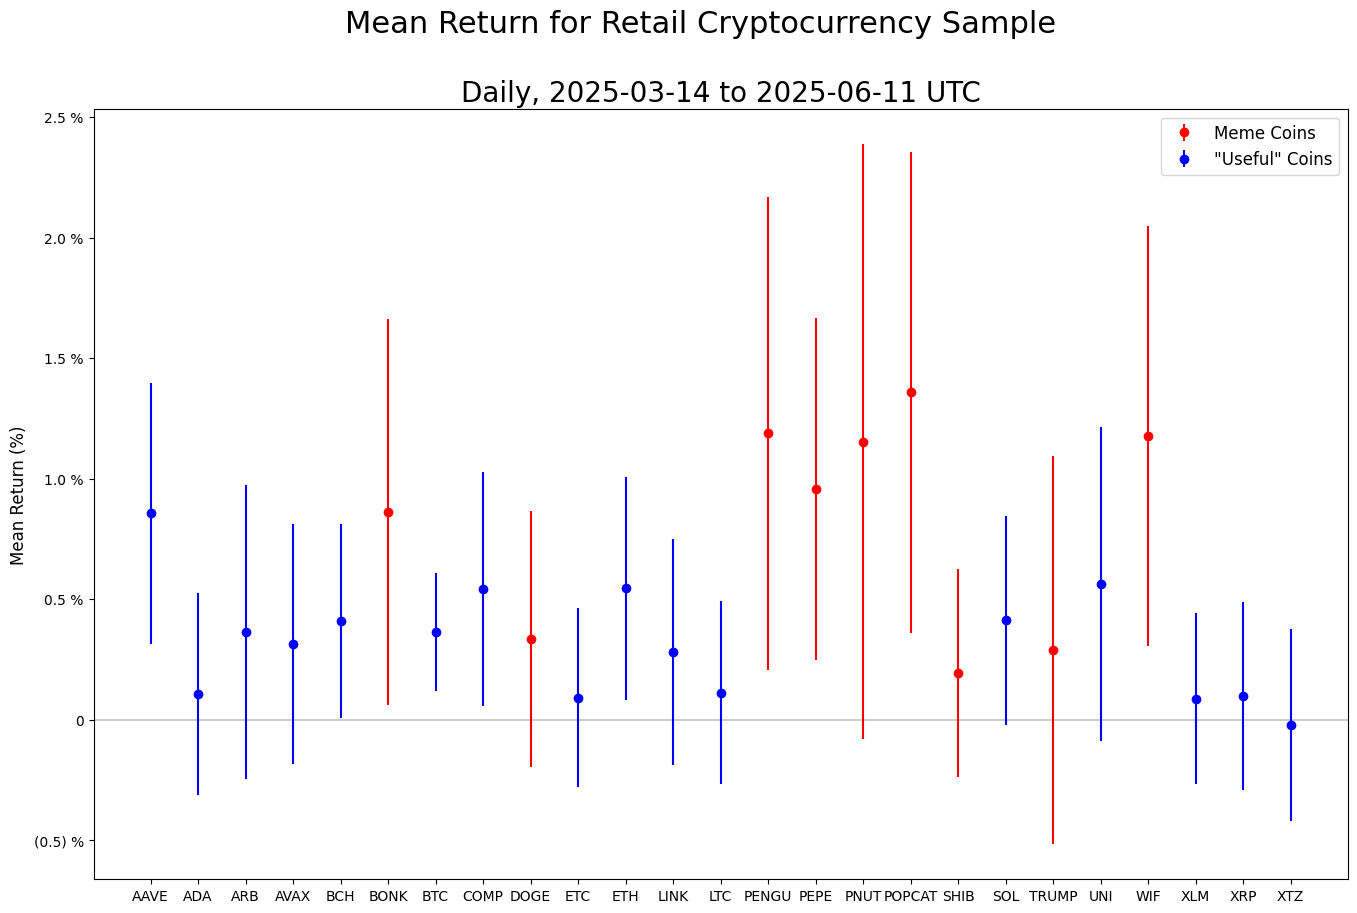

In [6]:
from scipy.stats import norm
nprint("Excluding recently listed coins from analysis: %s..." % ", ".join(c:=(data.index[-1]-data.apply(lambda x:x.first_valid_index(),axis=0)).apply(lambda x:np.nan if x.n>60 else x.n).dropna().index))

report=pd.DataFrame({ # drop recently listed coins and then drop na's, to ensure we have sufficient history for this analysis
    "Median":(design:=data.drop(columns=c).dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in meme_coins else zero for t in m.index]
})

display(report)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (design.index[0],design.index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

## ANOVA Analysis by Meme Coin Indicator
### ANOVA Analysis

In [7]:
from statsmodels.formula.api import ols as OLSformula
from statsmodels.stats.anova import anova_lm

nprint("One Way ANOVA Analysis by {}".format(group_name:="Meme Coin"))
anova=anova_lm(OLSformula("Mean ~ {:s}".format(group_name.replace(" ","_")),report.rename(columns={c:c.replace(" ","_") for c in report})).fit(),typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova['Adjusted p Value']=anova["p Value"]*ten
anova['Adjusted Significance']=anova['Adjusted p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

14:07:42 One Way ANOVA Analysis by Meme Coin


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance,Adjusted p Value,Adjusted Significance
Variation,,,,,,,
Between Groups,1.522834,1.0,14.480989,0.000911,***,0.00911,**
Within Groups,2.418701,23.0,,,,,


### Aggregate Properties of the Empirical Distributions of the Members of the two Groups

In [8]:
universe=list(set(meme_coins).difference(c))
report=pd.DataFrame([v.melt().describe().rename(columns={"value":k}).iloc[:,0] for k,v in \
          [("Meme Coins",design[universe]),('"Useful" Coins',design.drop(columns=universe))]])
report.rename(columns={"count":"Sample","std":"Std.Dev.","min":"Minimum","max":"Maximum","mean":"Mean"},inplace=True)
report["Std.Err."]=report["Std.Dev."]/np.sqrt(report["Sample"])
report["t Statistic"]=report["Mean"]/report["Std.Err."]
report["p Value"]=report["t Statistic"].apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))
report["Significance"]=report["p Value"].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
display(report)

,Sample,Mean,Std.Dev.,Minimum,25%,50%,75%,Maximum,Std.Err.,t Statistic,p Value,Significance
Meme Coins,810.0,0.834045,8.034082,-20.417809,-3.476436,0.111130,3.740649,76.138701,0.282289,2.954581,0.003131,**
"""Useful"" Coins",1440.0,0.319865,4.301574,-15.966234,-1.971038,0.186859,2.272440,27.730008,0.113356,2.821767,0.004776,**
